In [ ]:
! pip install --quiet vietocr

# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
config['weights'] = './weights/transformerocr.pth'
#config['cnn']['pretrained']=False
#config['device'] = 'cuda:0'

In [ ]:
detector = Predictor(config)

In [ ]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2022-12-07 14:27:40--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K   455KB/s    in 0.7s    

2022-12-07 14:27:42 (455 KB/s) - ‘sample.zip’ saved [305969/305969]



In [ ]:
! ls sample | shuf |head -n 5

033303003954.jpeg
072199003062.jpeg
038071004740.jpeg
464_FIRESTORM_29099.jpg
034097001515.jpeg


'chất lượng Công nghệ thông tin và truyền thông kiểm tra, xử phạt vì phạm hành chính các tổ chức,'

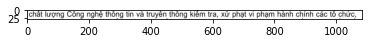

In [ ]:
img = 'tmp4BC.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

['tmp4BC.png',
 'tmp5EF3.png',
 'tmp975B.png',
 'tmpADD1.png',
 'tmp8076.png',
 'tmpB0CF.png']

chất lượng Công nghệ thông tin và truyền thông kiểm tra, xử phạt vì phạm hành chính các tổ chức,
cá nhân sản xuất, nhập khẩu, sử dụng thiết bị PTTH, TTKD vi phạm các quy định về sử dụng tần số
b) Chủ trì thanh tra, kiểm tra việc chấp hành các quy định của pháp luật về quản lý chất
a) Hướng dẫn các Sở Thông tin và Truyền thông, Cục Tần số vô tuyến điện, Cục Quản lý
vô tuyến điện, tiêu chuẩn, chất lượng của thiết bị phát sóng vô tuyến điện,
lượng, tiêu chuẩn, quy chuẩn kỹ thuật, tần số vô tuyến điện đối với thiết bị PTTH, TTKD khi có yêu


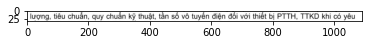

In [ ]:
arr = listdir('tets')
for x in arr:
  x = Image.open(x)
  plt.imshow(x)
  s = detector.predict(x)
  print(s)

# Train model

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':2,
         'valid_every':15*2,
          'iters':200,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 100
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 2,
  'valid_every': 30,
  'iters': 200,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 100},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'ima

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|████████████████████████████████████| 38/38 [00:00<00:00, 91916.70it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|████████████████████████████████████| 38/38 [00:00<00:00, 77034.10it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

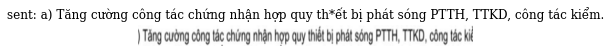

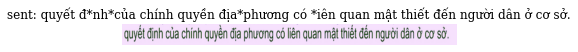

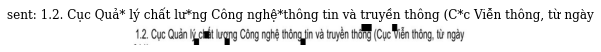

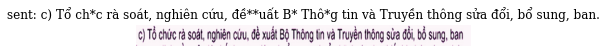

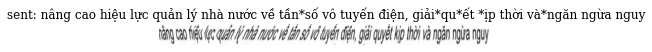

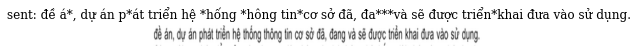

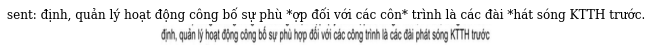

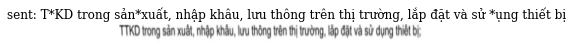

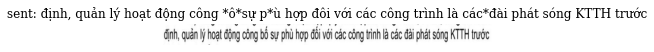

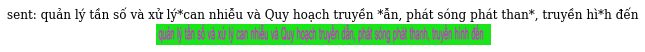

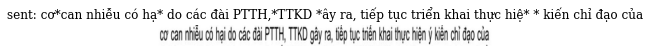

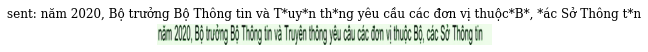

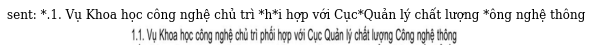

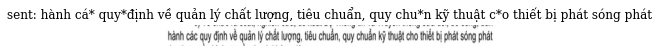

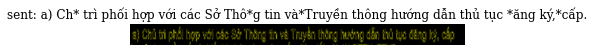

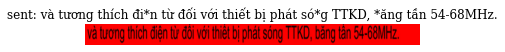

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000002 - train loss: 1.043 - lr: 1.98e-05 - load time: 0.58 - gpu time: 1.15
iter: 000004 - train loss: 1.032 - lr: 4.24e-05 - load time: 0.89 - gpu time: 1.08
iter: 000006 - train loss: 1.077 - lr: 7.72e-05 - load time: 1.03 - gpu time: 1.08
iter: 000008 - train loss: 1.081 - lr: 1.21e-04 - load time: 1.12 - gpu time: 1.09
iter: 000010 - train loss: 1.023 - lr: 1.68e-04 - load time: 0.97 - gpu time: 1.08
iter: 000012 - train loss: 0.953 - lr: 2.14e-04 - load time: 0.85 - gpu time: 1.09
iter: 000014 - train loss: 0.963 - lr: 2.54e-04 - load time: 1.01 - gpu time: 1.09
iter: 000016 - train loss: 0.896 - lr: 2.83e-04 - load time: 1.08 - gpu time: 1.09
iter: 000018 - train loss: 0.878 - lr: 2.98e-04 - load time: 0.96 - gpu time: 1.09
iter: 000020 - train loss: 0.892 - lr: 3.00e-04 - load time: 1.12 - gpu time: 1.09
iter: 000022 - train loss: 0.879 - lr: 3.00e-04 - load time: 1.16 - gpu time: 1.10
iter: 000024 - train loss: 0.841 - lr: 2.99e-04 - load time: 1.07 - gpu time: 1.10
iter

Visualize prediction from our trained model


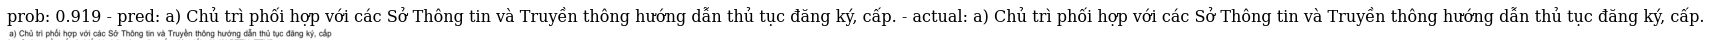

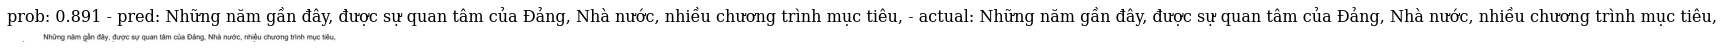

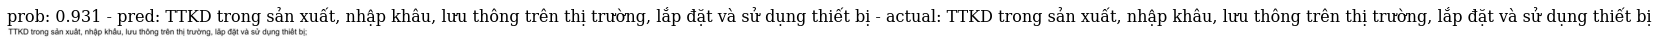

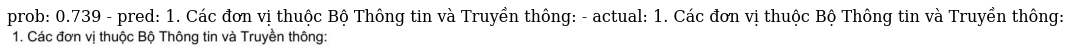

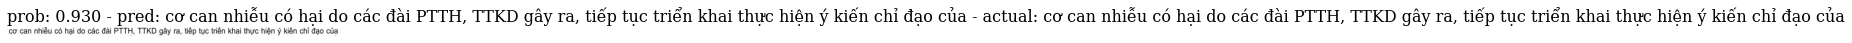

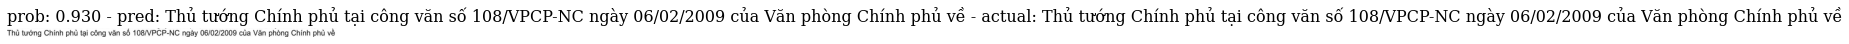

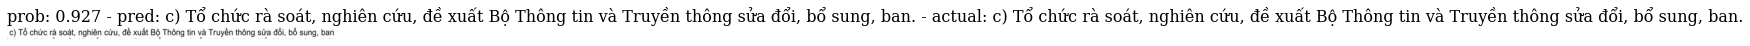

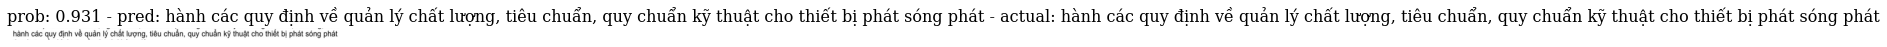

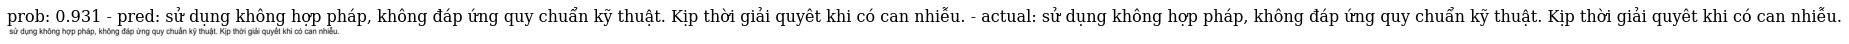

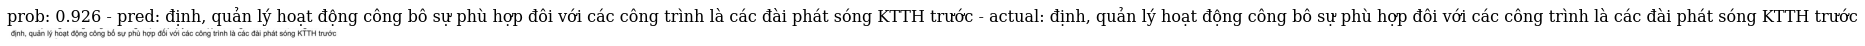

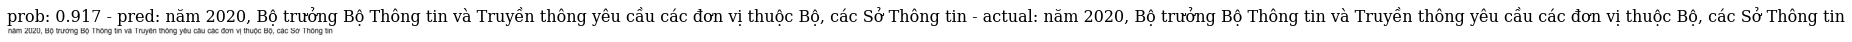

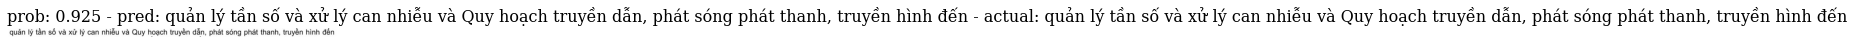

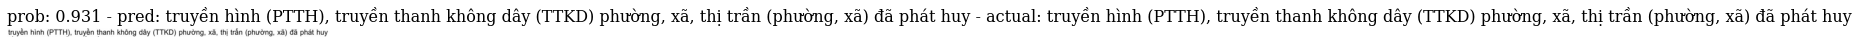

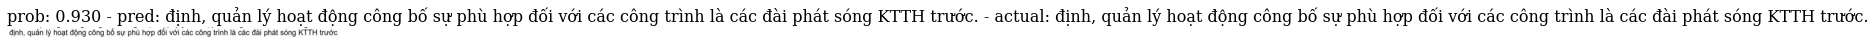

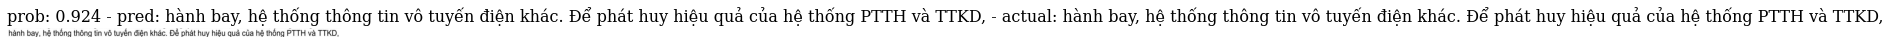

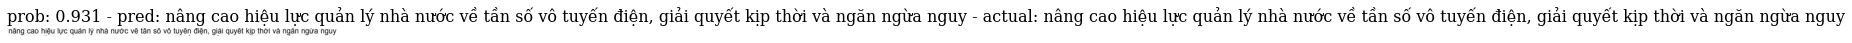

In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(1.0, 1.0)